<a href="https://colab.research.google.com/github/asiftandel96/DS-Use-Cases/blob/main/EDA_By_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [ ]:
#Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
# Loading the dataset
df=pd.read_csv('/content/sample_data/GlobalLandTemperaturesByMajorCity.csv')

In [ ]:
# Checking the first five rows of the data
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [ ]:
#Checking the columns of the dataset
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
# Describe of the data
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [ ]:
# Shape of the data
df.shape

(239177, 7)

In [ ]:
# Checking the first five rows of the data
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [ ]:
# Rename columns of the data 
df.rename(columns={'AverageTemperature':'Temperature','AverageTemperatureUncertainty':'deviation'},inplace=True)

In [ ]:
# Checking the missing values in the dataset
df.isnull().sum()

dt                 0
Temperature    11002
deviation      11002
City               0
Country            0
Latitude           0
Longitude          0
dtype: int64

In [ ]:
# Checking dtypes of the columns
df.dtypes

dt              object
Temperature    float64
deviation      float64
City            object
Country         object
Latitude        object
Longitude       object
dtype: object

We can see that dt columns is a object here but we want to 
convert the column into datetime

In [ ]:
df['dt']=pd.to_datetime(df['dt'])

In [ ]:
# Extracting year from the dt columns
df['year']=df['dt'].dt.year

In [ ]:
# Extracting month from the dt columns
df['month']=df['dt'].dt.month

In [ ]:
# Extracting quarter from the dt columns
df['quarter']=df['dt'].dt.quarter

In [ ]:
df.columns

Index(['dt', 'Temperature', 'deviation', 'City', 'Country', 'Latitude',
       'Longitude', 'year', 'month', 'quarter'],
      dtype='object')

In [ ]:
# Checking the missing values of the dataset
df.isnull().mean()

dt             0.000000
Temperature    0.045999
deviation      0.045999
City           0.000000
Country        0.000000
Latitude       0.000000
Longitude      0.000000
year           0.000000
month          0.000000
quarter        0.000000
dtype: float64

So we can see that the columns (AverageTemperature,AverageTemperatureUncertainty) has missing values.

In [ ]:
# Dropping missing values from the data
df.dropna(inplace=True)

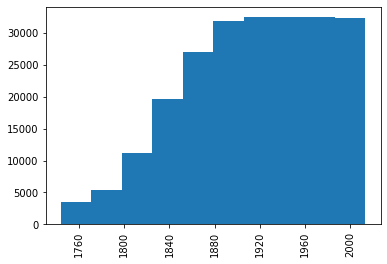

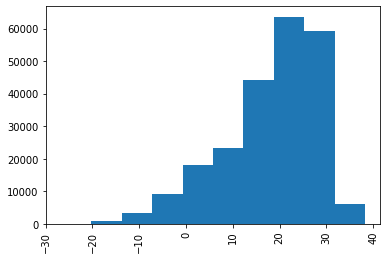

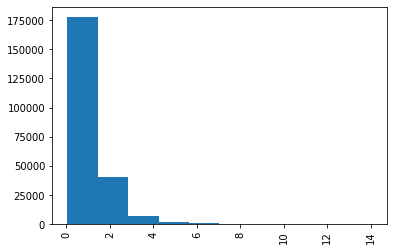

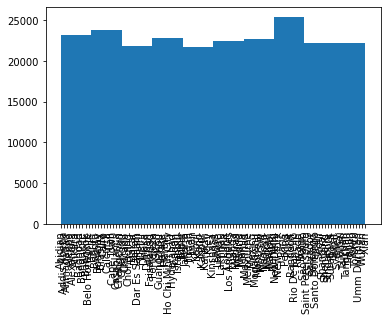

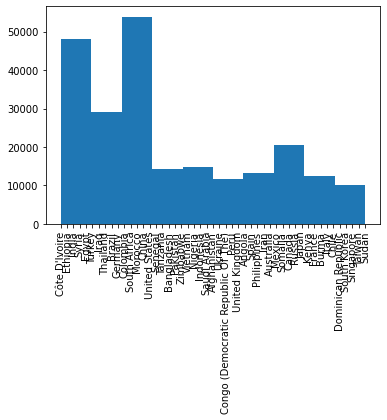

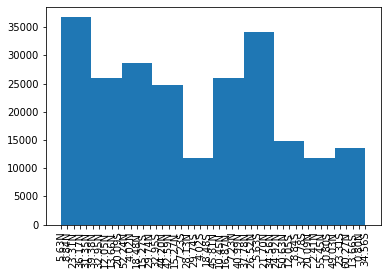

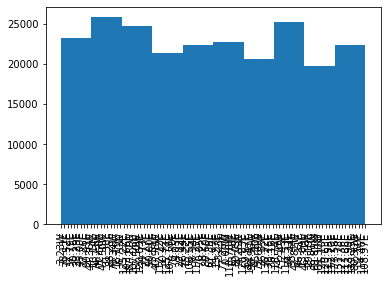

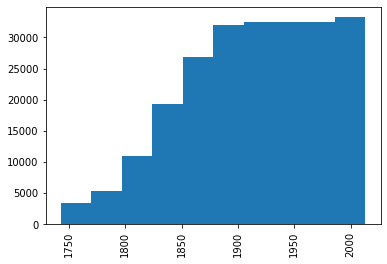

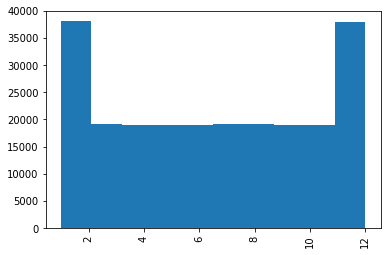

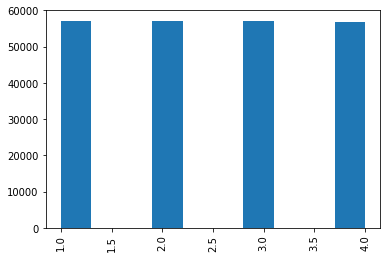

In [ ]:
# Check the distribution of columns
for i in df.columns:
    plt.hist(df[i])
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# dropping the columns dt
df.drop(['dt'],axis=1,inplace=True)

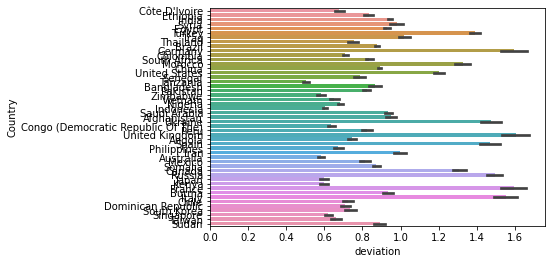

In [ ]:
# Visualizing Deviation with Country
sns.barplot(x=df['deviation'],y=df['Country'],orient='h')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


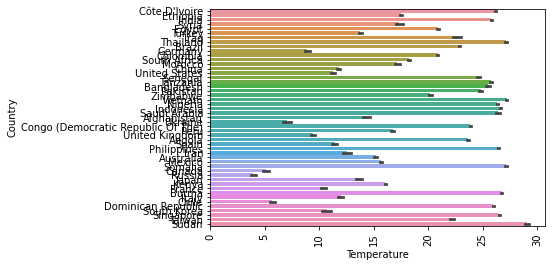

In [ ]:
# Visualization Temperature with Country
sns.barplot(df['Temperature'],y=df['Country'],orient='h')
plt.xticks(rotation=90)
plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 <a list of 10 Text major ticklabel objects>)

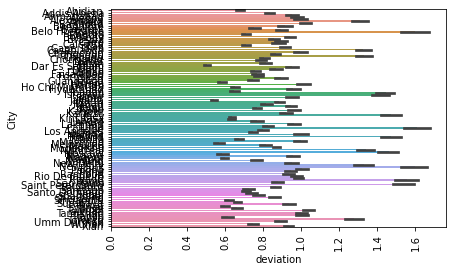

In [ ]:
sns.barplot(x=df['deviation'],y=df['City'])
plt.xticks(rotation=90)

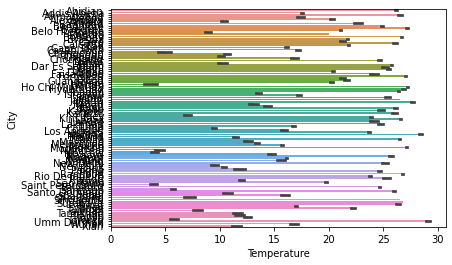

In [ ]:
sns.barplot(x=df['Temperature'],y=df['City'])

In [ ]:
# The maximum temperature of 10 Country 
df.groupby('Country')['Temperature'].agg('max').sort_values(ascending=False).head()

Country
Iraq            38.283
Saudi Arabia    37.859
India           36.477
Pakistan        36.346
Sudan           35.700
Name: Temperature, dtype: float64

Asian Country are more warm than Europe/Australia etc

In [ ]:
# The minimum temperature of 10 Country
df.groupby('Country')['Temperature'].agg('min').sort_values().head()

Country
China     -26.772
Russia    -19.376
Canada    -18.363
Ukraine   -16.191
Germany   -10.125
Name: Temperature, dtype: float64

European Country are colder than Asian Countries.Now we want
to see which Country and City have more deviation(Change in
temperature over a period of Time)

In [ ]:
# The maximum temperature of City
df.groupby('City')[['year','month','Temperature']].agg('max').sort_values('Temperature',ascending=False).head()

,year,month,Temperature
City,,,
Baghdad,2013,12,38.283
Riyadh,2013,12,37.859
Jaipur,2013,12,36.477
Lahore,2013,12,36.346
Faisalabad,2013,12,36.346


Asian City are warmer in Winter Season also that's very 
interesting!!!

In [ ]:
# The minimum temperature of the City with respect to Temperatures
df.groupby('City')['Temperature'].agg('min').sort_values().head()

City
Harbin             -26.772
Changchun          -23.272
Moscow             -19.376
Saint Petersburg   -18.644
Montreal           -18.363
Name: Temperature, dtype: float64

In [ ]:
# groupby City
df.groupby('City')[['year','month','Temperature','deviation']].agg('max').sort_values('deviation',ascending=False).head()

,year,month,Temperature,deviation
City,,,,
Berlin,2013,12,23.795,14.037
London,2013,12,20.743,13.560
Paris,2013,12,23.264,13.224
Rome,2013,12,25.951,12.166
Saint Petersburg,2013,12,21.921,11.685


In [ ]:
df.groupby('City')[['Country','Temperature','deviation']].agg('max').sort_values('deviation',ascending=False).tail()

,Country,Temperature,deviation
City,,,
Nairobi,Kenya,19.446,2.701
Lagos,Nigeria,29.032,2.682
Dar Es Salaam,Tanzania,29.131,2.651
Jakarta,Indonesia,28.756,2.531
Kinshasa,Congo (Democratic Republic Of The),26.426,2.407


In [ ]:
df.groupby('City')[['year','month','Temperature','deviation']].agg('min').sort_values('deviation').head(10)

,year,month,Temperature,deviation
City,,,,
Belo Horizonte,1832,1,15.920,0.040
Tokyo,1845,1,-1.580,0.049
Calcutta,1796,1,15.253,0.056
Changchun,1820,1,-23.272,0.056
Moscow,1743,1,-19.376,0.060
Nagoya,1841,1,1.423,0.060
London,1743,1,-2.781,0.060
Izmir,1753,1,5.607,0.062
Montreal,1743,1,-18.363,0.065


In [ ]:
# Correlation with Independent Variables
df.corr()

,Temperature,deviation,year,month,quarter
Temperature,1.000000,-0.199380,0.146691,0.102462,0.105495
deviation,-0.199380,1.000000,-0.748272,-0.039538,-0.039238
year,0.146691,-0.748272,1.000000,-0.004004,-0.003906
month,0.102462,-0.039538,-0.004004,1.000000,0.971616
quarter,0.105495,-0.039238,-0.003906,0.971616,1.000000


In [ ]:
df1=df.copy()

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X=df1.drop(['City','Country','Latitude','Longitude','deviation','month'],axis=1)

In [ ]:
df1.head()

,Temperature,deviation,City,Country,Latitude,Longitude,year,month,quarter
0,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1
1,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,1
2,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3,1
3,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4,2
4,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5,2


In [ ]:
df1.drop(['City','Country','Latitude','Longitude'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
df_2=scaled.fit_transform(df1)

In [ ]:
df_scaled=pd.DataFrame(df_2)
df_scaled

,0,1,2,3,4
0,0.855683,0.475334,-1.046229,-1.592023,-1.340426
1,0.928502,0.400816,-1.046229,-1.302288,-1.340426
2,0.995038,0.656012,-1.046229,-1.012554,-1.340426
3,0.799422,0.426336,-1.046229,-0.722819,-0.445861
4,0.728299,0.235450,-1.046229,-0.433084,-0.445861
...,...,...,...,...,...
228170,-0.554922,0.871397,1.597831,-0.722819,-0.445861
228171,0.085092,-0.165717,1.597831,-0.433084,-0.445861
228172,0.538269,-0.329042,1.597831,-0.143349,-0.445861
228173,0.710742,0.074166,1.597831,0.146385,0.448703


In [ ]:
df1.columns

Index(['Temperature', 'deviation', 'year', 'month', 'quarter'], dtype='object')

In [ ]:
df_scaled.rename(columns={0:'Temperature', 1:'deviation',2:'year',3:'month',4:'quarter'},inplace=True)

In [ ]:
calc_vif(X)

,variables,VIF
0,Temperature,4.372385
1,year,8.553901
2,quarter,6.020481


In [ ]:
df_scaled.dtypes

Temperature    float64
deviation      float64
year           float64
month          float64
quarter        float64
dtype: object

In [ ]:
# Check the Outliers in the dataset(Is it affecting or not is the question or show we take it depend
#on the context or data we are handling)
# Checking For Temperature Feature
IQR=df1.Temperature.quantile(0.75) - df1.Temperature.quantile(0.25)
IQR

13.208000000000009

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


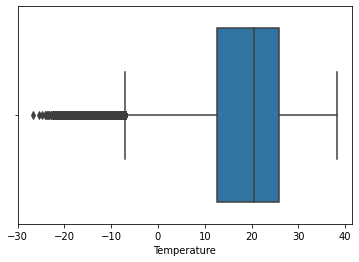

In [ ]:
# Visualize of Outliers using Boxplot
sns.boxplot(df1['Temperature'])

In [ ]:
# Check lower_bridge and upper_bridge of Temperature Features
lower_bridge=df1.Temperature.quantile(0.25) -(1.5*IQR)
upper_bridge=df1.Temperature.quantile(0.75) + (1.5*IQR)
print(lower_bridge)
print(upper_bridge)

-7.102000000000011
45.73000000000002


In [ ]:
# Checking lower_extreme and upper extreme of Temperature Features
lower_extreme=df1.Temperature.mean() - 3*df.Temperature.std()
upper_extreme=df1.Temperature.mean() + 3*df.Temperature.std()
print(lower_extreme)
print(upper_extreme)

-11.94843027860064
48.20036798430904


In [ ]:
# Checking IQR of deviation features
IQR=df1.deviation.quantile(0.75) - df1.deviation.quantile(0.25)
IQR

0.98

In [ ]:
# Checking lower_bridge and upper_bridge
lower_bridge=df1.deviation.quantile(0.25) - (1.5*IQR)
upper_bridge=df1.deviation.quantile(0.75) + (1.5*IQR)
print(lower_bridge)
print(upper_bridge)

-1.13
2.79


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


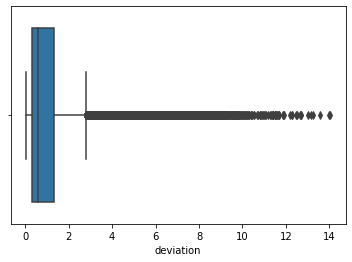

In [ ]:
# Checking Visualization of deviation Features with boxplot
sns.boxplot(df1['deviation'])

In [ ]:
# Calculating lower_extreme and upper_extreme values
lower_extreme_dev=df1.deviation.mean() - 3*df1.deviation.std()
upper_extreme_dev=df1.deviation.mean() + 3*df1.deviation.std()
print(lower_extreme_dev)
print(upper_extreme_dev)

-1.9695882961603548
3.908275172461476


In [ ]:
# Now Handling Categorical Features  Like City,Country
df['City'].unique()

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

In [ ]:
df['Country'].unique()

array(["Côte D'Ivoire", 'Ethiopia', 'India', 'Syria', 'Egypt', 'Turkey',
       'Iraq', 'Thailand', 'Brazil', 'Germany', 'Colombia',
       'South Africa', 'Morocco', 'China', 'United States', 'Senegal',
       'Tanzania', 'Bangladesh', 'Pakistan', 'Zimbabwe', 'Vietnam',
       'Nigeria', 'Indonesia', 'Saudi Arabia', 'Afghanistan', 'Ukraine',
       'Congo (Democratic Republic Of The)', 'Peru', 'United Kingdom',
       'Angola', 'Spain', 'Philippines', 'Iran', 'Australia', 'Mexico',
       'Somalia', 'Canada', 'Russia', 'Japan', 'Kenya', 'France', 'Burma',
       'Italy', 'Chile', 'Dominican Republic', 'South Korea', 'Singapore',
       'Taiwan', 'Sudan'], dtype=object)

In [ ]:
len(df.Country.unique())

49

In [ ]:
df['Country'].value_counts(normalize=True).head(25)

China             0.153181
India             0.151756
Brazil            0.053200
Turkey            0.040491
United States     0.036099
Egypt             0.033089
Pakistan          0.028443
Russia            0.027751
Canada            0.027531
Nigeria           0.022790
Australia         0.018135
Japan             0.017750
Colombia          0.017544
Saudi Arabia      0.016899
Indonesia         0.016470
South Africa      0.016417
Germany           0.013875
France            0.013875
United Kingdom    0.013875
Spain             0.013875
Ukraine           0.013875
Italy             0.013875
Morocco           0.012771
Burma             0.011097
Bangladesh        0.011097
Name: Country, dtype: float64

In [ ]:
# Let take the most frequent label for the feature Country 
df.Country.value_counts().sort_values(ascending=False).head(25)

China             34952
India             34627
Brazil            12139
Turkey             9239
United States      8237
Egypt              7550
Pakistan           6490
Russia             6332
Canada             6282
Nigeria            5200
Australia          4138
Japan              4050
Colombia           4003
Saudi Arabia       3856
Indonesia          3758
South Africa       3746
Germany            3166
France             3166
United Kingdom     3166
Spain              3166
Ukraine            3166
Italy              3166
Morocco            2914
Burma              2532
Bangladesh         2532
Name: Country, dtype: int64

In [ ]:
# Let make a list with the most frequent label for Feature Country
top_25_country=[y for y in df.Country.value_counts().sort_values(ascending=False).head(25).index]
print(top_25_country,end=" ")

['China', 'India', 'Brazil', 'Turkey', 'United States', 'Egypt', 'Pakistan', 'Russia', 'Canada', 'Nigeria', 'Australia', 'Japan', 'Colombia', 'Saudi Arabia', 'Indonesia', 'South Africa', 'Germany', 'France', 'United Kingdom', 'Spain', 'Ukraine', 'Italy', 'Morocco', 'Burma', 'Bangladesh'] 

In [ ]:
# get whole set of dummy variables for all the categorical variables
def one_hot_encoding(df,variables,top_x_labels):
  for labels in top_x_labels:
    df[variables+'_'+labels]=np.where(df[variables]==labels,1,0)

In [ ]:
# Using Custom made Function one_hot_encoding into df
one_hot_encoding(df,'Country',top_25_country)

In [ ]:
df.drop(['Country_China'],axis=1,inplace=True)

In [ ]:
df.head()

,Temperature,deviation,City,Country,Latitude,Longitude,year,month,quarter,Country_India,Country_Brazil,Country_Turkey,Country_United States,Country_Egypt,Country_Pakistan,Country_Russia,Country_Canada,Country_Nigeria,Country_Australia,Country_Japan,Country_Colombia,Country_Saudi Arabia,Country_Indonesia,Country_South Africa,Country_Germany,Country_France,Country_United Kingdom,Country_Spain,Country_Ukraine,Country_Italy,Country_Morocco,Country_Burma,Country_Bangladesh
0,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum()

Temperature               0
deviation                 0
City                      0
Country                   0
Latitude                  0
Longitude                 0
year                      0
month                     0
quarter                   0
Country_India             0
Country_Brazil            0
Country_Turkey            0
Country_United States     0
Country_Egypt             0
Country_Pakistan          0
Country_Russia            0
Country_Canada            0
Country_Nigeria           0
Country_Australia         0
Country_Japan             0
Country_Colombia          0
Country_Saudi Arabia      0
Country_Indonesia         0
Country_South Africa      0
Country_Germany           0
Country_France            0
Country_United Kingdom    0
Country_Spain             0
Country_Ukraine           0
Country_Italy             0
Country_Morocco           0
Country_Burma             0
Country_Bangladesh        0
dtype: int64

In [ ]:
# Top_50_City
top_50_City=[y for y in df.City.value_counts().sort_values(ascending=False).head(50).index]
print(top_50_City)

['Moscow', 'Istanbul', 'Berlin', 'Madrid', 'Saint Petersburg', 'Kiev', 'Rome', 'Paris', 'London', 'Montreal', 'Toronto', 'Chicago', 'Izmir', 'New York', 'Ankara', 'Casablanca', 'Alexandria', 'Rangoon', 'Calcutta', 'Dhaka', 'Surat', 'Nagpur', 'Madras', 'Pune', 'Bombay', 'Bangalore', 'Hyderabad', 'Aleppo', 'Kanpur', 'Lakhnau', 'Ahmadabad', 'Gizeh', 'Cairo', 'Jaipur', 'Delhi', 'New Delhi', 'Karachi', 'Baghdad', 'Harbin', 'Changchun', 'Taiyuan', 'Tianjin', 'Peking', 'Tangshan', 'Bangkok', 'Santo Domingo', 'Shenyang', 'Chengdu', 'Mashhad', 'Mexico']


In [ ]:
one_hot_encoding(df,'City',top_50_City)

In [ ]:
df.head()

,Temperature,deviation,City,Country,Latitude,Longitude,year,month,quarter,Country_India,Country_Brazil,Country_Turkey,Country_United States,Country_Egypt,Country_Pakistan,Country_Russia,Country_Canada,Country_Nigeria,Country_Australia,Country_Japan,Country_Colombia,Country_Saudi Arabia,Country_Indonesia,Country_South Africa,Country_Germany,Country_France,Country_United Kingdom,Country_Spain,Country_Ukraine,Country_Italy,Country_Morocco,Country_Burma,Country_Bangladesh,City_Moscow,City_Istanbul,City_Berlin,City_Madrid,City_Saint Petersburg,City_Kiev,City_Rome,...,City_Toronto,City_Chicago,City_Izmir,City_New York,City_Ankara,City_Casablanca,City_Alexandria,City_Rangoon,City_Calcutta,City_Dhaka,City_Surat,City_Nagpur,City_Madras,City_Pune,City_Bombay,City_Bangalore,City_Hyderabad,City_Aleppo,City_Kanpur,City_Lakhnau,City_Ahmadabad,City_Gizeh,City_Cairo,City_Jaipur,City_Delhi,City_New Delhi,City_Karachi,City_Baghdad,City_Harbin,City_Changchun,City_Taiyuan,City_Tianjin,City_Peking,City_Tangshan,City_Bangkok,City_Santo Domingo,City_Shenyang,City_Chengdu,City_Mashhad,City_Mexico
0,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Country_encoded=pd.get_dummies(df['Country'],drop_first=True)

In [ ]:
Country_encoded

,Angola,Australia,Bangladesh,Brazil,Burma,Canada,Chile,China,Colombia,Congo (Democratic Republic Of The),Côte D'Ivoire,Dominican Republic,Egypt,Ethiopia,France,Germany,India,Indonesia,Iran,Iraq,Italy,Japan,Kenya,Mexico,Morocco,Nigeria,Pakistan,Peru,Philippines,Russia,Saudi Arabia,Senegal,Singapore,Somalia,South Africa,South Korea,Spain,Sudan,Syria,Taiwan,Tanzania,Thailand,Turkey,Ukraine,United Kingdom,United States,Vietnam,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239171,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
239172,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
239173,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
239174,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
City_encoded=pd.get_dummies(df['City'],drop_first=True)

In [ ]:
City_encoded.head()

,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,Belo Horizonte,Berlin,Bogotá,Bombay,Brasília,Cairo,Calcutta,Cali,Cape Town,Casablanca,Changchun,Chengdu,Chicago,Chongqing,Dakar,Dalian,Dar Es Salaam,Delhi,Dhaka,Durban,Faisalabad,Fortaleza,Gizeh,Guangzhou,Harare,Harbin,Ho Chi Minh City,Hyderabad,Ibadan,Istanbul,Izmir,Jaipur,...,Mashhad,Melbourne,Mexico,Mogadishu,Montreal,Moscow,Nagoya,Nagpur,Nairobi,Nanjing,New Delhi,New York,Paris,Peking,Pune,Rangoon,Rio De Janeiro,Riyadh,Rome,Saint Petersburg,Salvador,Santiago,Santo Domingo,Seoul,Shanghai,Shenyang,Singapore,Surabaya,Surat,Sydney,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_standard=pd.concat([df_scaled,Country_encoded,City_encoded],axis=1)

In [ ]:
df_standard.shape

(238796, 152)

In [ ]:
df_climate=pd.concat([df1,City_encoded],axis=1)

In [ ]:
df_climate.shape

(228175, 104)

In [ ]:
df['City'].value_counts(normalize=True).head()

Moscow              0.013875
Istanbul            0.013875
Berlin              0.013875
Madrid              0.013875
Saint Petersburg    0.013875
Name: City, dtype: float64

In [ ]:
X=df.drop(['Latitude','Longitude','City','Country','month','deviation'],axis=1)
y=df.deviation.values

In [ ]:
X.head()

,Temperature,year,quarter,Country_India,Country_Brazil,Country_Turkey,Country_United States,Country_Egypt,Country_Pakistan,Country_Russia,Country_Canada,Country_Nigeria,Country_Australia,Country_Japan,Country_Colombia,Country_Saudi Arabia,Country_Indonesia,Country_South Africa,Country_Germany,Country_France,Country_United Kingdom,Country_Spain,Country_Ukraine,Country_Italy,Country_Morocco,Country_Burma,Country_Bangladesh,City_Moscow,City_Istanbul,City_Berlin,City_Madrid,City_Saint Petersburg,City_Kiev,City_Rome,City_Paris,City_London,City_Montreal,City_Toronto,City_Chicago,City_Izmir,City_New York,City_Ankara,City_Casablanca,City_Alexandria,City_Rangoon,City_Calcutta,City_Dhaka,City_Surat,City_Nagpur,City_Madras,City_Pune,City_Bombay,City_Bangalore,City_Hyderabad,City_Aleppo,City_Kanpur,City_Lakhnau,City_Ahmadabad,City_Gizeh,City_Cairo,City_Jaipur,City_Delhi,City_New Delhi,City_Karachi,City_Baghdad,City_Harbin,City_Changchun,City_Taiyuan,City_Tianjin,City_Peking,City_Tangshan,City_Bangkok,City_Santo Domingo,City_Shenyang,City_Chengdu,City_Mashhad,City_Mexico
0,26.704,1849,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,27.434,1849,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28.101,1849,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,26.140,1849,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25.427,1849,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

array([1.435, 1.362, 1.612, ..., 0.647, 1.042, 0.84 ])

In [ ]:
# Splitting Data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
print('The training data of the model is:',X_train.shape,y_train.shape)
print('The testing data of the model is:',X_test.shape,y_test.shape)

The training data of the model is: (182540, 77) (182540,)
The testing data of the model is: (45635, 77) (45635,)


In [ ]:
# Using Linear Regression model
from sklearn.linear_model import LinearRegression
model_lm=LinearRegression()
model_lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predicting the model
y_pred=model_lm.predict(X_test)

In [ ]:
# Evaluating the metrics of Model
from sklearn.metrics import r2_score,mean_squared_error
print("Train Accuracy is:", r2_score(y_train, model_lm.predict(X_train)))
print("Test Accuracy is :", r2_score(y_pred,y_test))
print('The mean_squared_error is:',mean_squared_error(y_test,y_pred))

Train Accuracy is: 0.5781796655619034
Test Accuracy is : 0.22945745275497498
The mean_squared_error is: 0.42668129280972156


In [ ]:
from sklearn.linear_model import Lasso
model_ls=Lasso(alpha=0.75,random_state=1)
model_ls.fit(X_train,y_train)

Lasso(alpha=0.75, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred_1=model_ls.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("Train Accuracy :: ", r2_score(y_train, model_ls.predict(X_train)))
print("Test Accuracy :: ", r2_score(y_pred_1,y_test))
print('The mean_squared_error is:',mean_squared_error(y_test,y_pred_1))

Train Accuracy ::  0.5623270048633648
Test Accuracy ::  0.14580760315403973
The mean_squared_error is: 0.44354091236933


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor(random_state=1)
model_dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
y_pred_dt=model_dt.predict(X_test)

In [ ]:
print('Training accuracy of Decision Tree Regressor is:',r2_score(y_train,model_dt.predict(X_train)))
print('Testing accuracy of Decision Tree Regressor is:',r2_score(y_pred_dt,y_test))
print('The mean_squared_error is:',mean_squared_error(y_test,y_pred_dt))

Training accuracy of Decision Tree Regressor is: 0.9999619922488199
Testing accuracy of Decision Tree Regressor is: 0.6102233602625324
The mean_squared_error is: 0.39162194096636344


In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#model_rf=RandomForestRegressor()
#model_rf.fit(X_train,y_train)

In [ ]:
#y_pred_rf=model_rf.predict(X_test)

In [ ]:
#print('The training accuracy is:',r2_score(y_train,model_rf.predict(X_train)))
#print('The testing accuracy is:',r2_score(y_pred_rf,y_test))
#print('The mean_squared error is:',mean_squared_error(y_test,y_pred_rf))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_knn=KNeighborsRegressor()
model_knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
#List Hyperparameters that we want to tune.
#from sklearn.model_selection import GridSearchCV
#leaf_size = range(1,50)
#n_neighbors = range(1,30)
#p=[1,2]
#Convert to dictionary
#hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
#knn_2 = KNeighborsRegressor()
#Use GridSearch
#clf = GridSearchCV(knn_2, hyperparameters, cv=3,n_jobs=-1)
#Fit the model
#best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
y_pred_knn=model_knn.predict(X_test)

In [ ]:
print('The training accuracy is:',r2_score(y_train,model_knn.predict(X_train)))
print('The testing accuracy is:',r2_score(y_pred_knn,y_test))
print('The mean_squared_error is:',mean_squared_error(y_test,y_pred_knn))

The training accuracy is: 0.8264950981430473
The testing accuracy is: 0.6598618530113176
The mean_squared_error is: 0.2595668499958365


In [ ]:
# Ordinary Least Squares
import statsmodels.api as sm
model_ols=sm.OLS(y,X)
res=model_ols.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.521
Method:                 Least Squares   F-statistic:                              3945.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):                        0.00
Time:                        16:08:56   Log-Likelihood:                     -3.1288e+05
No. Observations:              228175   AIC:                                  6.259e+05
Df Residuals:                  228112   BIC:                                  6.265e+05
Df Model:                          63                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)